# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.

Not sure where to begin? Scroll to the bottom to find challenges!

In [6]:
df = pd.read_csv("netflix_dataset.csv", index_col=0)

## Import Package

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: How much variety exists in Netflix's offering? Base this on three variables: `type`, `country`, and `listed_in`.
- 📊 **Visualize**: Build a word cloud from the movie and TV shows descriptions. Make sure to remove stop words!
- 🔎 **Analyze**: Has Netflix invested more in certain genres (see `listed_in`) in recent years? What about certain age groups (see `ratings`)?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A talent agency has hired you to analyze patterns in the professional relationships of cast members and directors. The key deliverable is a network graph where each node represents a cast member or director. An edge represents a movie or TV show worked on by both nodes in this undirected graph. You can limit the actors to the first four names listed in `cast`. The client is interested in any insights you can derive from your Netflix network analysis, such as actor/actor and actor/director pairs that work most closely together, most popular actors and directors to work with, and graph differences over time.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

## BUSINESS PROBLEM

## Data Exploration

In [8]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

In [5]:
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,director,2634,29.91
1,country,831,9.44
2,cast,825,9.37
3,date_added,10,0.11
4,rating,4,0.05
5,duration,3,0.03


NameError: name 'sns' is not defined

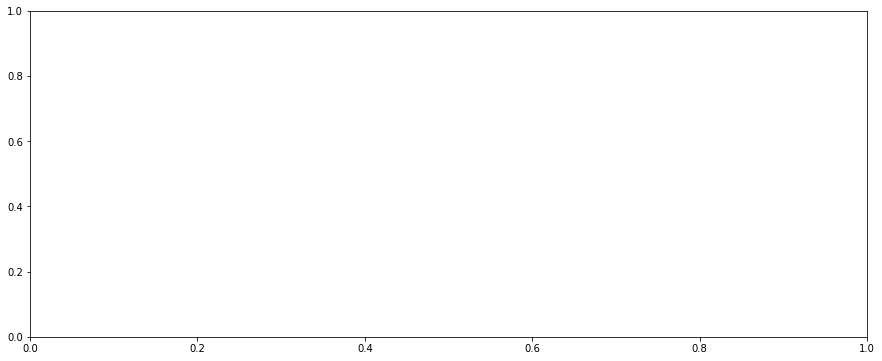

In [ ]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(15,6))

g = sns.barplot(x = 'Features',y='Percentage',data=df_null,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

# percentage of missing values
x = np.arange(len(df_null['Features']))
y = df_null['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 12, color='black', fontweight='bold')
    
text = 'There are 7 (35%) features that have missing value.'

ax.text(0,9,text,horizontalalignment='left',color='black',fontsize=15, fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0, 10)
plt.show()

In [10]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [20]:
print(df.country.value_counts())
print('Jumlah unik di kolom negara ""= '+str(len(df.country.unique())))

United States                           2818
India                                    972
United Kingdom                           419
Japan                                    245
South Korea                              199
                                        ... 
United Kingdom, Pakistan                   1
Norway, Denmark, Netherlands, Sweden       1
Philippines, Singapore, Indonesia          1
United Kingdom, Spain, United States       1
France, Lebanon                            1
Name: country, Length: 748, dtype: int64
Jumlah unik di kolom negara = 749


In [23]:
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64